In [1]:
import sys
sys.path.append("./Tagging/lib/python3.6/site-packages")

import numpy as np
import pandas as pd

import re

import matplotlib.pyplot as plt

#Locate and list all xlms files so they can be opened all together

import os

xlms_files = []
for root, dirs, files in os.walk("."):  
    for filename in files:
        if filename[-4:]=='xlsm':  #Add to the list if the element's last four spaces form the word "xlsm"
            xlms_files += [filename]
        
xlms_files

['Rolls Royce Derby EOS Rotatives.xlsm',
 'Rolls Royce Jubilee House.xlsm',
 'Tag_50111119_Gillingham_Operations_Centre.xlsm',
 'Rolly Royce Inchinnan.xlsm',
 '2018-96-05 Bracknell Waterside House.xlsm',
 'Tag_50450069_Andover_Keens_House.xlsm',
 'Vodafone Atlas Park.xlsm',
 'Rolls Royce Heathrow.xlsm',
 'Rolls Royce Barnoldswick.xlsm',
 'Tag_50450189_Manchester_Brotherton_House.xlsm']

In [2]:
#concatenate all files into a huge dataset

inputs = []

for file in xlms_files:
    xl = pd.ExcelFile(file)
    if "Input" in xl.sheet_names:
        df = xl.parse('Output for SkySpark') #Go to "Tagging" tab
        inputs += [df] 

inputs = pd.concat(inputs) #Concatenate them one below the next one
inputs = inputs.dropna(subset=["service"]) #Drop row if service value is equals zero
inputs = inputs.reset_index() #Restart the index from zero to its length
inputs = inputs.drop(columns=["index"]) #Drop old index

inputs

pointId                        siteLabel      service  \
0          1  Rolls Royce Derby EOS Rotatives      Cooling   
1          2  Rolls Royce Derby EOS Rotatives      Cooling   
2          3  Rolls Royce Derby EOS Rotatives      Cooling   
3          4  Rolls Royce Derby EOS Rotatives      Cooling   
4          5  Rolls Royce Derby EOS Rotatives      Cooling   
5          6  Rolls Royce Derby EOS Rotatives      Cooling   
6          7  Rolls Royce Derby EOS Rotatives      Cooling   
7          8  Rolls Royce Derby EOS Rotatives      Cooling   
8          9  Rolls Royce Derby EOS Rotatives      Cooling   
9         10  Rolls Royce Derby EOS Rotatives      Cooling   
10        11  Rolls Royce Derby EOS Rotatives      Cooling   
11        12  Rolls Royce Derby EOS Rotatives      Cooling   
12        13  Rolls Royce Derby EOS Rotatives      Cooling   
13        14  Rolls Royce Derby EOS Rotatives      Cooling   
14        15  Rolls Royce Derby EOS Rotatives      Cooling   
15        16  Rolls Royce Derby EOS Rotatives      Cooling   
16        17  Rolls Royce Derby EOS Rotatives      Cooling   
17        18  Rolls Royce Derby EOS Rotatives      Cooling   
18        19  Rolls Royce Derby EOS Rotatives      Cooling   
19        20  Rolls Royce Derby EOS Rotatives      Cooling   
20        21  Rolls Royce Derby EOS Rotatives      Cooling   
21        22  Rolls Royce Derby EOS Rotatives      Cooling   
22        23  Rolls Royce Derby EOS Rotatives      Cooling   
23        24  Rolls Royce Derby EOS Rotatives      Cooling   
24        25  Rolls Royce Derby EOS Rotatives      Cooling   
25        26  Rolls Royce Derby EOS Rotatives      Cooling   
26        27  Rolls Royce Derby EOS Rotatives      Cooling   
27        28  Rolls Royce Derby EOS Rotatives      Cooling   
28        29  Rolls Royce Derby EOS Rotatives      Cooling   
29        30  Rolls Royce Derby EOS Rotatives      Cooling   
...      ...                              ...          ...   
5105     491        50450189 Brotherton House      Cooling   
5106     492        50450189 Brotherton House      Cooling   
5107     493        50450189 Brotherton House      Cooling   
5108     494        50450189 Brotherton House      Cooling   
5109     495        50450189 Brotherton House      Cooling   
5110     496        50450189 Brotherton House      Cooling   
5111     497        50450189 Brotherton House      Cooling   
5112     498        50450189 Brotherton House      Heating   
5113     499        50450189 Brotherton House      Heating   
5114     500        50450189 Brotherton House      Heating   
5115     501        50450189 Brotherton House      Heating   
5116     502        50450189 Brotherton House      Heating   
5117     503        50450189 Brotherton House      Heating   
5118     504        50450189 Brotherton House      Heating   
5119     505        50450189 Brotherton House      Heating   
5120     506        50450189 Brotherton House      Heating   
5121     507        50450189 Brotherton House      Heating   
5122     508        50450189 Brotherton House      Heating   
5123     509        50450189 Brotherton House      Heating   
5124     510        50450189 Brotherton House  Ventilation   
5125     511        50450189 Brotherton House  Ventilation   
5126     512        50450189 Brotherton House  Ventilation   
5127     513        50450189 Brotherton House  Ventilation   
5128     514        50450189 Brotherton House  Ventilation   
5129     515        50450189 Brotherton House  Ventilation   
5130     516        50450189 Brotherton House  Ventilation   
5131     517        50450189 Brotherton House  Ventilation   
5132     518        50450189 Brotherton House  Ventilation   
5133     519        50450189 Brotherton House  Ventilation   
5134     520        50450189 Brotherton House  Ventilation   

                equipName      equipTags   parentEquipName   ipAddress  \
0             Compressors   chillerPlant               NaN   10.10.2.5   
1           

In [3]:
text_list = [inputs["pointLabel"].tolist()[i].lower() for i in range(0,inputs.shape[0])]

In [4]:
import re

text_list = [re.sub(r"[0-9]", "",text_list[i]).split() for i in range(0,len(text_list))]

In [5]:
dictionary = pd.read_csv("dict.csv",header=None).set_index(0).T.to_dict("list")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [6]:
for i in range(0,len(text_list)):    
    for j in range(0,len(text_list[i])):
        if text_list[i][j] in dictionary:
            text_list[i][j] = dictionary[text_list[i][j]][0]

In [7]:
text_list

[['compressor', 'house', 'fans'],
 ['compressed', 'air', 'pressure'],
 ['compressions', 'air', 'met'],
 ['compressor', 'air', 'high', 'pressure', 'sp'],
 ['compressor', 'air', 'low', 'pressure', 'sp'],
 ['compressor', 'extract', 'fan', 'sp'],
 ['compressor', 'house', 'temp'],
 ['compressor', 'fault'],
 ['compressor', 'fault'],
 ['compressor', 'fault'],
 ['compressor', 'fault'],
 ['compressor', 'fault'],
 ['compressor', 'extract', 'fans', 'fault'],
 ['condenser', 'unit', 'fault'],
 ['cryo', 'compressor', 'fault'],
 ['cryo', 'unit', 'fault'],
 ['compressor', 'air', 'hi-pressure'],
 ['compressor', 'air', 'lo-pressure'],
 ['compress', 'air', 'pulse'],
 ['compressor', 'running'],
 ['compressor', 'running'],
 ['compressor', 'running'],
 ['compressor', 'running'],
 ['compressor', 'running'],
 ['compressor', 'extract', 'fans', 'running'],
 ['condenser', 'high', 'ph', 'level'],
 ['potable', 'cws', 'booster'],
 ['potable', 'low', 'water'],
 ['potable', 'tank', 'level'],
 ['potable', 'booster', '

In [8]:
class SequenceIterator:
    def __init__(self, dataset, label_points, ref_points, outputs, dictionary):
        
        self.dataset = dataset
        self.label_points = label_points
        self.ref_points = ref_points
        self.outputs = outputs
        
        self.labels = dataset[label_points]
        self.refs = dataset[ref_points]
        self.y = dataset[outputs]
        
        self.dictionary = dictionary
              
    def __iter__(self):
        for label,ref,tags in zip(self.labels, self.refs, self.y):
            
            label = label + " " + ref[0]
            #Eliminate numbers?
            label = re.sub(r"[0-9]","",label)
            #Lower case characters
            label = label.lower().split()
            
            tags = re.sub(",","",tags)
            tags = tags.split()
            
            #Clean it from dictionary            
            for i in range(0,len(label)):
                if label[i] in dictionary:
                    label[i] = dictionary[label[i]][0]
                    
            words = [w for w in label]
            
            yield words, tags

In [9]:
dictionary = pd.read_csv("dict.csv",header=None).set_index(0).T.to_dict("list")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [10]:
sentences = SequenceIterator(inputs, "pointLabel", "pointRef", "pointTags", dictionary)

In [11]:
y = []
words = []

for label, tags in sentences:
    words += [label]
    y += [tags]

In [12]:
words

[['compressor', 'house', 'fans', 'd'],
 ['compressed', 'air', 'pressure', 's'],
 ['compressions', 'air', 'met', 's'],
 ['compressor', 'air', 'high', 'pressure', 'sp', 'k'],
 ['compressor', 'air', 'low', 'pressure', 'sp', 'k'],
 ['compressor', 'extract', 'fan', 'sp', 'k'],
 ['compressor', 'house', 'temp', 's'],
 ['compressor', 'fault', 'i'],
 ['compressor', 'fault', 'i'],
 ['compressor', 'fault', 'i'],
 ['compressor', 'fault', 'i'],
 ['compressor', 'fault', 'i'],
 ['compressor', 'extract', 'fans', 'fault', 'i'],
 ['condenser', 'unit', 'fault', 'i'],
 ['cryo', 'compressor', 'fault', 'i'],
 ['cryo', 'unit', 'fault', 'i'],
 ['compressor', 'air', 'hi-pressure', 'i'],
 ['compressor', 'air', 'lo-pressure', 'i'],
 ['compress', 'air', 'pulse', 'i'],
 ['compressor', 'running', 'i'],
 ['compressor', 'running', 'i'],
 ['compressor', 'running', 'i'],
 ['compressor', 'running', 'i'],
 ['compressor', 'running', 'i'],
 ['compressor', 'extract', 'fans', 'running', 'i'],
 ['condenser', 'high', 'ph', 'le

## Word2vect embedding

In [13]:
import gensim

In [14]:
w2v_model = gensim.models.Word2Vec(
        words,
        size=3,
        window=10,
        min_count=2,
        workers=10)

w2v_model.train(words, total_examples=len(words), epochs=10)

(97336, 197630)

In [15]:
w2v_model.wv.most_similar(positive="temp")

[('south', 0.9987358450889587),
 ('override', 0.9968340396881104),
 ('hold', 0.9958455562591553),
 ('north', 0.9956836700439453),
 ('avg', 0.9943782687187195),
 ('oat', 0.9942001700401306),
 ('east', 0.992270827293396),
 ('wing', 0.9896550178527832),
 ('return', 0.9893822073936462),
 ('optimiser', 0.9860785007476807)]

In [16]:
# Retrieve the weights from the model. This is used for initializing the weights
# in a Keras Embedding layer later
w2v_weights = w2v_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

In [17]:
len(w2v_model.wv.vectors)

518

In [18]:
def word2token(word):
    try:    
        return w2v_model.wv.vocab[word].index
    # If word is not in index return 0. I realize this means that this
    # is the same as the word of index 0 (i.e. most frequent word), but 0s
    # will be padded later anyway by the embedding layer (which also
    # seems dirty but I couldn't find a better solution right now)
    except:
        return 0

def token2word(token):
    return w2v_model.wv.index2word[token]

## Iterator class

In [19]:
class SequenceIterator:
    def __init__(self, dataset, label_points, ref_points, outputs, dictionary):
        
        self.dataset = dataset
        self.label_points = label_points
        self.ref_points = ref_points
        self.outputs = outputs
        
        self.labels = dataset[label_points]
        self.refs = dataset[ref_points]
        self.y = dataset[outputs]
        
        self.dictionary = dictionary

    def __iter__(self):
        for label,ref,category in zip(self.labels, self.refs, self.y):
            
            label = label + " " + ref[0]
            #Eliminate numbers?
            label = re.sub(r"[0-9]","",label)
            #Lower case characters
            label = label.lower().split()
            
            #Clean it from dictionary           
            for i in range(0,len(label)):
                if label[i] in dictionary:
                    label[i] = dictionary[label[i]][0]
                    
            words = np.array([word2token(w) for w in label])
            
            yield(words,category)

In [20]:
sequences = SequenceIterator(inputs, "pointLabel", "pointRef", "service", dictionary)

In [21]:
inputs["service"].unique()

array(['Cooling', 'Globals', 'Heating', 'Lighting', 'Metering',
       'Monitoring', 'Terminals', 'Ventilation'], dtype=object)

In [22]:
cat_dict = {k: v for k,v in zip(inputs["service"].unique(), range(len(inputs["service"].unique())))}

In [23]:
cat_dict

{'Cooling': 0,
 'Globals': 1,
 'Heating': 2,
 'Lighting': 3,
 'Metering': 4,
 'Monitoring': 5,
 'Terminals': 6,
 'Ventilation': 7}

In [24]:
range(len(inputs["service"]))

range(0, 5135)

In [25]:
set_x = []
set_y = []
for w,c in sequences:
    set_x.append(w)
    set_y.append(cat_dict[c])

In [26]:
set_x

[array([ 29, 420,  79,   2]),
 array([421,  26,  45,   1]),
 array([ 0, 26,  0,  1]),
 array([29, 26, 73, 45, 20,  3]),
 array([29, 26, 67, 45, 20,  3]),
 array([29, 16, 11, 20,  3]),
 array([ 29, 420,   5,   1]),
 array([29, 19,  0]),
 array([29, 19,  0]),
 array([29, 19,  0]),
 array([29, 19,  0]),
 array([29, 19,  0]),
 array([29, 16, 79, 19,  0]),
 array([422,  28,  19,   0]),
 array([423,  29,  19,   0]),
 array([423,  28,  19,   0]),
 array([29, 26,  0,  0]),
 array([29, 26,  0,  0]),
 array([424,  26,  92,   0]),
 array([ 29, 186,   0]),
 array([ 29, 186,   0]),
 array([ 29, 186,   0]),
 array([ 29, 186,   0]),
 array([ 29, 186,   0]),
 array([ 29,  16,  79, 186,   0]),
 array([422,  73,   0, 122,   0]),
 array([218, 157, 196,   2]),
 array([218,  67,  56,   2]),
 array([218, 118, 122,   3]),
 array([218, 196,  19,   0]),
 array([218, 425,  19,   0]),
 array([218, 118, 122,   1]),
 array([218,  56, 118,   5,   1]),
 array([218, 157, 196,  22]),
 array([219, 157, 196,   2]),
 arr

In [27]:
MAX_SEQUENCE_LENGTH = 0
for label in set_x:
    if len(label) > MAX_SEQUENCE_LENGTH:
        MAX_SEQUENCE_LENGTH = len(label)
        
MAX_SEQUENCE_LENGTH

8

In [28]:
from keras.preprocessing.sequence import pad_sequences

#Padding sequences with 0
set_x = pad_sequences(set_x, maxlen=MAX_SEQUENCE_LENGTH, padding="pre", value=0)
set_y = np.array(set_y)

Using TensorFlow backend.


In [29]:
set_x

array([[  0,   0,   0, ..., 420,  79,   2],
       [  0,   0,   0, ...,  26,  45,   1],
       [  0,   0,   0, ...,  26,   0,   1],
       ...,
       [  0,   0,   0, ...,  57,  16,   2],
       [  0,   0,   0, ...,  16,  79,  37],
       [  0,   0,   0, ..., 304,   4,   2]], dtype=int32)

In [30]:
set_y

array([0, 0, 0, ..., 7, 7, 7])

In [31]:
set_x.shape,set_y.shape

((5135, 8), (5135,))

## Splitting dataset in training and validation

In [32]:
VALID_PER = 0.08 #Percentage of the whole set taken for validation

total_samples = set_x.shape[0]
n_val = int(VALID_PER * total_samples)
n_train = total_samples - n_val

In [33]:
import random

random_i = random.sample(range(total_samples), total_samples)
#random_i[:n_train] generates a random list of the length of the training set, so there may be 
#elements untaken in there, therefore it is shuffled so it is better for training?
train_x = set_x[random_i[:n_train]]
train_y = set_y[random_i[:n_train]]
val_x = set_x[random_i[n_train:n_train+n_val]]
val_y = set_y[random_i[n_train:n_train+n_val]]

val_labels = inputs["pointLabel"].values[random_i[n_train:n_train+n_val]]

In [34]:
repetitions = 5

train_x = np.repeat(train_x, repetitions, axis=0)
train_y = np.repeat(train_y, repetitions, axis=0)

train_x.shape, train_y.shape

((23625, 8), (23625,))

In [35]:
train_x

array([[ 0,  0,  0, ...,  4, 19,  0],
       [ 0,  0,  0, ...,  4, 19,  0],
       [ 0,  0,  0, ...,  4, 19,  0],
       ...,
       [ 0,  0,  0, ..., 37, 42,  0],
       [ 0,  0,  0, ..., 37, 42,  0],
       [ 0,  0,  0, ..., 37, 42,  0]], dtype=int32)

In [36]:
val_y

array([2, 2, 7, 6, 6, 6, 6, 7, 7, 7, 7, 7, 2, 6, 2, 6, 7, 6, 7, 6, 7, 0,
       7, 7, 7, 7, 6, 1, 7, 7, 7, 2, 7, 7, 6, 7, 6, 7, 2, 7, 6, 6, 7, 7,
       7, 7, 0, 2, 2, 6, 6, 7, 7, 6, 7, 7, 6, 7, 7, 2, 6, 7, 7, 6, 6, 4,
       6, 7, 7, 7, 6, 7, 4, 7, 7, 6, 6, 0, 7, 1, 7, 7, 6, 2, 6, 7, 7, 7,
       6, 7, 7, 1, 6, 6, 7, 7, 7, 7, 7, 2, 6, 7, 6, 5, 7, 7, 6, 7, 6, 7,
       1, 6, 4, 1, 6, 7, 7, 6, 2, 2, 7, 7, 6, 6, 7, 6, 6, 6, 7, 7, 2, 7,
       7, 7, 5, 0, 6, 6, 2, 2, 6, 2, 7, 2, 6, 7, 6, 6, 6, 6, 7, 6, 2, 6,
       7, 6, 6, 7, 7, 7, 6, 6, 6, 6, 2, 6, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7,
       6, 6, 5, 7, 6, 6, 6, 6, 7, 7, 7, 7, 6, 1, 6, 1, 0, 6, 6, 6, 2, 6,
       7, 6, 7, 6, 6, 6, 0, 2, 7, 6, 6, 6, 1, 6, 7, 6, 2, 7, 6, 2, 6, 4,
       6, 6, 6, 7, 0, 6, 6, 2, 7, 0, 6, 6, 7, 7, 2, 7, 6, 2, 7, 1, 6, 4,
       7, 6, 7, 7, 7, 6, 6, 7, 7, 7, 7, 6, 6, 6, 1, 6, 7, 6, 7, 6, 7, 6,
       7, 2, 7, 7, 0, 7, 6, 6, 6, 6, 7, 7, 7, 1, 6, 7, 2, 6, 6, 7, 6, 6,
       6, 6, 7, 2, 2, 6, 7, 2, 6, 6, 6, 6, 6, 6, 7,

In [37]:
print("Train Shapes - X: {} - Y: {}".format(train_x.shape, train_y.shape))
print("Val Shapes - X: {} - Y: {}".format(val_x.shape, val_y.shape))

Train Shapes - X: (23625, 8) - Y: (23625,)
Val Shapes - X: (410, 8) - Y: (410,)


In [38]:
categories, ccount = np.unique(val_y, return_counts=True)

In [39]:
n_categories = len(categories)

## Defining and training LSTM model

In [51]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()

# Keras Embedding layer with Word2Vec weights initialization
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    weights=[w2v_weights],
                    input_length=MAX_SEQUENCE_LENGTH,
                    mask_zero=True,
                    trainable=False))

model.add(Bidirectional(LSTM(150)))
model.add(Dense(n_categories + 1, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=43, batch_size=50,
                    validation_data=(val_x, val_y), verbose=1)

Train on 23625 samples, validate on 410 samples
Epoch 1/43
23625/23625 [==============================] - 24s 1ms/step - loss: 1.0489 - acc: 0.6359 - val_loss: 0.8015 - val_acc: 0.7146
Epoch 2/43
23625/23625 [==============================] - 20s 865us/step - loss: 0.7550 - acc: 0.7373 - val_loss: 0.6300 - val_acc: 0.7732
Epoch 3/43
23625/23625 [==============================] - 19s 799us/step - loss: 0.6160 - acc: 0.7848 - val_loss: 0.5363 - val_acc: 0.8122
Epoch 4/43
23625/23625 [==============================] - 19s 805us/step - loss: 0.5069 - acc: 0.8226 - val_loss: 0.4649 - val_acc: 0.8220
Epoch 5/43
23625/23625 [==============================] - 22s 917us/step - loss: 0.4141 - acc: 0.8560 - val_loss: 0.4235 - val_acc: 0.8463
Epoch 6/43
23625/23625 [==============================] - 21s 891us/step - loss: 0.3434 - acc: 0.8821 - val_loss: 0.3650 - val_acc: 0.8805
Epoch 7/43
23625/23625 [==============================] - 20s 847us/step - loss: 0.2889 - acc: 0.9061 - val_loss: 0.3564

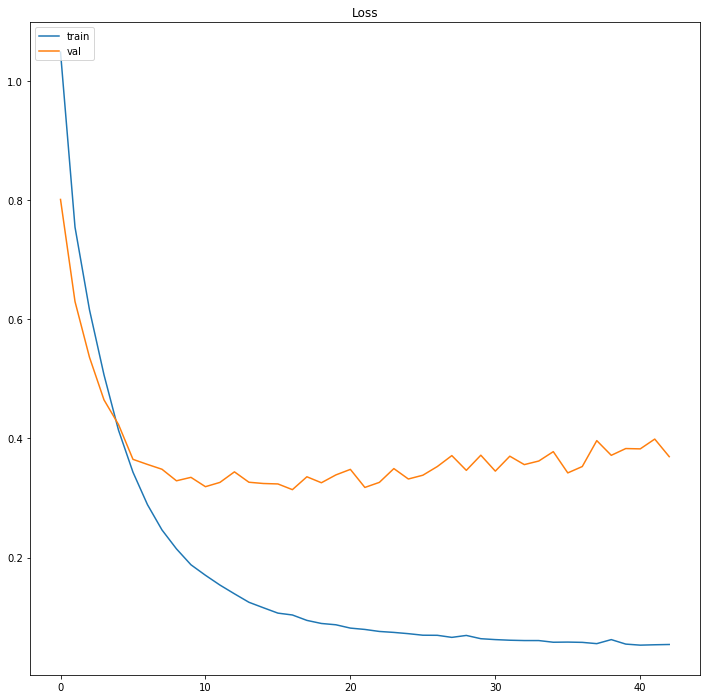

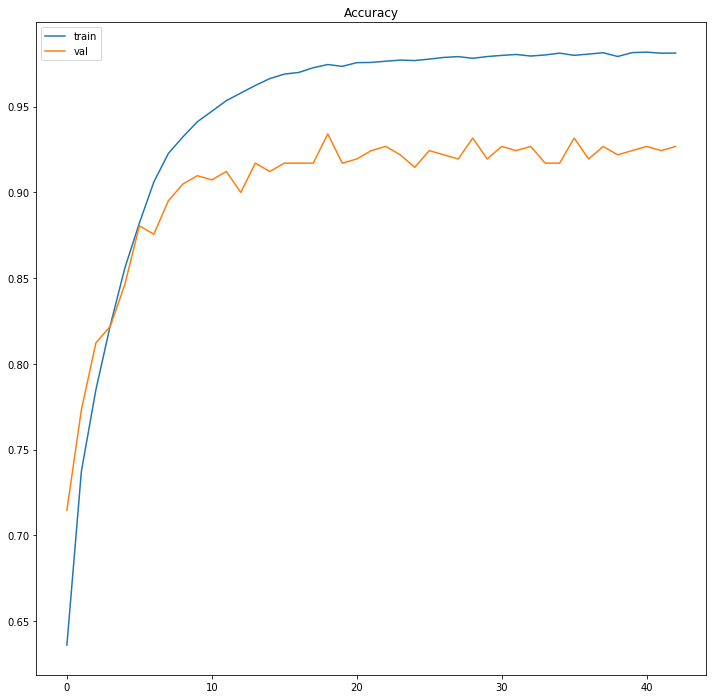

In [52]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(12, 12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
predicted = model.predict_classes(val_x)
predicted_proba = model.predict_proba(val_x)

In [54]:
inverse_cat_dict = {v: k for k, v in cat_dict.items()}

In [55]:
#Translate categories (real and validated) back into tags
predicted_categories = [inverse_cat_dict[cat] for cat in predicted]
real_categories = [inverse_cat_dict[cat] for cat in val_y]

In [74]:
discard_threshold = 0.72
results=[]

for i in range(0,predicted.shape[0]):
    results += [[" ".join(words[i]), predicted_categories[i], predicted_proba[i][predicted[i]], real_categories[i], predicted_proba[i][val_y[i]], predicted[i] == val_y[i], predicted_proba[i][predicted[i]]<discard_threshold]]

In [75]:
results = pd.DataFrame(results, columns=["Label","Predicted Category","Prob.","Real Cateogry","Prob.","Success?","Discard?"])

In [76]:
results

Label Predicted Category     Prob.  \
0              compressor house fans d          Terminals  0.973117   
1            compressed air pressure s            Heating  0.999247   
2               compressions air met s        Ventilation  1.000000   
3    compressor air high pressure sp k          Terminals  0.987551   
4     compressor air low pressure sp k          Terminals  0.999760   
5          compressor extract fan sp k          Terminals  0.981499   
6              compressor house temp s          Terminals  0.981283   
7                   compressor fault i        Ventilation  0.999931   
8                   compressor fault i        Ventilation  1.000000   
9                   compressor fault i        Ventilation  0.989120   
10                  compressor fault i          Terminals  0.797503   
11                  compressor fault i        Ventilation  0.999282   
12     compressor extract fans fault i            Heating  0.845272   
13              condenser unit fault i          Terminals  0.999161   
14             cryo compressor fault i        Ventilation  0.909428   
15                   cryo unit fault i          Terminals  0.999998   
16        compressor air hi-pressure i        Ventilation  0.999965   
17        compressor air lo-pressure i          Terminals  0.999974   
18                compress air pulse i        Ventilation  0.999971   
19                compressor running i          Terminals  0.999241   
20                compressor running i        Ventilation  0.897614   
21                compressor running i            Cooling  0.999861   
22                compressor running i        Ventilation  0.999973   
23                compressor running i        Ventilation  0.999930   
24   compressor extract fans running i        Ventilation  0.999998   
25           condenser high ph level i        Ventilation  1.000000   
26               potable cws booster d          Terminals  0.999998   
27                 potable low water d        Ventilation  0.808360   
28                potable tank level k        Ventilation  0.999878   
29             potable booster fault i          Terminals  0.899629   
..                                 ...                ...       ...   
380                    burner enable d            Heating  0.999611   
381                 recirc fresh air d        Ventilation  0.999999   
382             manual burner enable i          Terminals  0.999159   
383       space atmospheric pressure s          Terminals  0.999995   
384                       fan run on k            Globals  0.575659   
385                low temp hold off k            Cooling  0.959800   
386              maximum supply duct k          Terminals  0.999933   
387              minimum supply duct k          Terminals  0.999482   
388                  space set point k        Ventilation  0.596246   
389                      space frost k          Terminals  0.999964   
390                     ahu override w            Heating  0.997704   
391            ahu - main production z          Terminals  0.980746   
392                burner modulation d        Ventilation  1.000000   
393                       space temp s          Terminals  0.899629   
394                       space temp s          Terminals  0.997532   
395                       space temp s          Terminals  0.999069   
396                       space temp s          Terminals  0.997156   
397                       space temp s            Heating  0.995779   
398                  ahu supply temp s            Heating  0.999689   
399                  duct inlet temp s            Globals  0.997630   
400             ahu supply flow fail i        Ventilation  0.999982   
401                     burner fault i          Terminals  0.999998   
402            ahu low temp hold off i          Terminals  0.999998   
403         duct hi-temp stat active i          Terminals  0.999760   
404               panel filter dirty i        Ventilation

In [77]:
Accuracy = (len(list(results["Success?"]))-list(results["Success?"]).count(False))/len(list(results["Success?"]))*100

In [78]:
after_discard = results[results["Discard?"]==False]
Accuracy_after_discard = (len(list(after_discard["Success?"]))-list(after_discard["Success?"]).count(False))/len(list(after_discard["Success?"]))*100

In [79]:
Accuracy, Accuracy_after_discard

(92.6829268292683, 93.5)

In [80]:
results.to_csv("Results embedder bi-directional.csv")

In [81]:
results[results["Success?"]==False]

Label Predicted Category     Prob. Real Cateogry  \
0         compressor house fans d          Terminals  0.973117       Heating   
10             compressor fault i          Terminals  0.797503   Ventilation   
14        cryo compressor fault i        Ventilation  0.909428       Heating   
27            potable low water d        Ventilation  0.808360       Globals   
29        potable booster fault i          Terminals  0.899629   Ventilation   
38       process tracehtg fault i        Ventilation  0.808360       Heating   
47            fire alarm active i        Ventilation  0.999466       Heating   
63            fire alarm active i        Ventilation  0.958128     Terminals   
89             gas valve closed i          Terminals  0.995707   Ventilation   
104                      boiler i            Cooling  0.888573   Ventilation   
138          domestic hot water z        Ventilation  0.808360       Heating   
142            hws override rhs w          Terminals  0.744074   Ventilation   
170          os lights override w          Terminals  0.967500   Ventilation   
176                   os lights d        Ventilation  0.654519     Terminals   
198                   kwh meter i          Terminals  0.899629   Ventilation   
231           third stage frost i            Globals  0.720207     Terminals   
233        bind inspect ac unit d            Heating  0.999086   Ventilation   
234              binding ins ac z        Ventilation  0.993436       Heating   
262          grid lhs vrv fault i            Cooling  0.535932   Ventilation   
264                grid lhs vrv d            Globals  0.863546   Ventilation   
270   ground floor vrv override w        Ventilation  0.785070     Terminals   
311            vrv second fault i            Heating  0.985929       Cooling   
321            training room ac z        Ventilation  0.999995      Metering   
344      ahu heat recovery temp s            Heating  0.778046       Cooling   
351        ahu supply flow fail i          Terminals  0.919145   Ventilation   
360       ahu frost stat active i        Ventilation  0.993783       Heating   
371         ahu min supply temp k          Terminals  0.955401       Heating   
376    duct hi-temp stat active i        Ventilation  0.536723     Terminals   
378  outer shutter doors closed i         Monitoring  0.965519       Cooling   
384                  fan run on k            Globals  0.575659     Terminals   

            Prob.  Success?  Discard?  
0    1.690301e-02     False     False  
10   2.022228e-01     False     False  
14   7.662506e-02     False     False  
27   4.625392e-02     False     False  
29   1.000411e-01     False     False  
38   2.614777e-04     False     False  
47   5.329482e-05     False     False  
63   1.573333e-02     False     False  
89   2.073989e-03     False     False  
104  1.088413e-01     False     False  
138  2.614777e-04     False     False  
142  2.551287e-01     False     False  
170  1.291478e-03     False     False  
176  3.454612e-01     False      True  
198  1.000411e-01     False     False  
231  7.427251e-02     False     False  
233  8.766390e-04     False     False  
234  7.251571e-04     False     False  
262  6.967185e-02     False      True  
264  9.831418e-04     False     False  
270  2.144564e-01     False     False  
311  1.405554e-02     False     False  
321  1.441879e-07     False     False  
344  5.292527e-04     False     False  
351  8.055457e-02     False     False  
360  3.578301e-03     False     False  
371  3.167258e-02     False     False  
376  1.144501e-01     False      True  
378  2.113388e-02     False     False  
384  1.239650e-03     False      True